In [56]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
sns.set()

## Tiền xử lý

In [57]:
# Ghép cột price vào file X_train luôn 
raw_data = pd.read_csv('X_train.csv',thousands=',' , skipinitialspace=True)
raw_data1 = pd.read_csv('Y_train.csv',thousands=',' , skipinitialspace=True)
raw_data['price'] = raw_data1['price']
raw_data.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
0,1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,...,True,False,False,False,True,False,False,True,True,15500.0
1,2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,...,True,False,False,False,False,False,False,False,False,2800.0
2,3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,...,True,False,True,False,False,True,True,True,False,16700.0
3,4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,...,True,True,False,False,False,False,False,True,True,11000.0
4,5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,...,False,False,False,False,False,False,False,False,True,6800.0


In [58]:
raw_data.describe(include ='all')

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
count,30000.000000,30000,30000,30000,30000,30000.000000,30000.000000,30000,30000,29991.000000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000.000000
unique,NaN,50,992,2,12,NaN,NaN,5,3,NaN,...,2,2,2,2,2,2,2,2,2,NaN
top,NaN,Volkswagen,Passat,mechanical,black,NaN,NaN,gasoline,gasoline,NaN,...,True,False,False,False,False,False,False,False,True,NaN
freq,NaN,3425,1141,19929,6116,NaN,NaN,19081,19279,NaN,...,18894,23059,21449,22586,18995,24682,21790,17013,17867,NaN
mean,15000.500000,NaN,NaN,NaN,NaN,252853.225500,2003.127633,NaN,NaN,2.054022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6599.796028
std,8660.398374,NaN,NaN,NaN,NaN,131396.318447,7.515763,NaN,NaN,0.662445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6096.244533
min,1.000000,NaN,NaN,NaN,NaN,1.000000,1960.000000,NaN,NaN,0.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,7500.750000,NaN,NaN,NaN,NaN,163000.000000,1998.000000,NaN,NaN,1.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2300.000000
50%,15000.500000,NaN,NaN,NaN,NaN,250000.000000,2003.000000,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900.000000
75%,22500.250000,NaN,NaN,NaN,NaN,326412.500000,2009.000000,NaN,NaN,2.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8999.000000


 **Nhận xét:**
 * **model** có quá nhiều giá trị unique => Xóa cột model đi vì price sẽ ko chịu ảnh hưởng quá nhiều từ cột này
 * Xóa những hàng có missing values 

In [59]:
# xóa cột model
data = raw_data.drop(['model'],axis=1 )
# xóa các giá trị "NaN"
data.isnull().sum()
data= data.dropna(axis=0)
data.describe(include='all')

,id,manufacturer,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
count,29991.000000,29991,29991,29991,29991.000000,29991.000000,29991,29991,29991.000000,29991,...,29991,29991,29991,29991,29991,29991,29991,29991,29991,29991.000000
unique,NaN,50,2,12,NaN,NaN,4,2,NaN,12,...,2,2,2,2,2,2,2,2,2,NaN
top,NaN,Volkswagen,mechanical,black,NaN,NaN,gasoline,gasoline,NaN,sedan,...,True,False,False,False,False,False,False,False,True,NaN
freq,NaN,3425,19929,6115,NaN,NaN,19081,19279,NaN,9897,...,18887,23053,21447,22580,18993,24677,21790,17011,17859,NaN
mean,15000.157514,NaN,NaN,NaN,252907.284119,2003.124371,NaN,NaN,2.054022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6596.436659
std,8660.116848,NaN,NaN,NaN,131377.237398,7.514463,NaN,NaN,0.662445,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6092.176086
min,1.000000,NaN,NaN,NaN,1.000000,1960.000000,NaN,NaN,0.200000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,7500.500000,NaN,NaN,NaN,163000.000000,1998.000000,NaN,NaN,1.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2300.000000
50%,15001.000000,NaN,NaN,NaN,250000.000000,2003.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900.000000
75%,22499.500000,NaN,NaN,NaN,326500.000000,2009.000000,NaN,NaN,2.300000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8990.000000


#### Phân tích giá tổng quan giá xe (price)

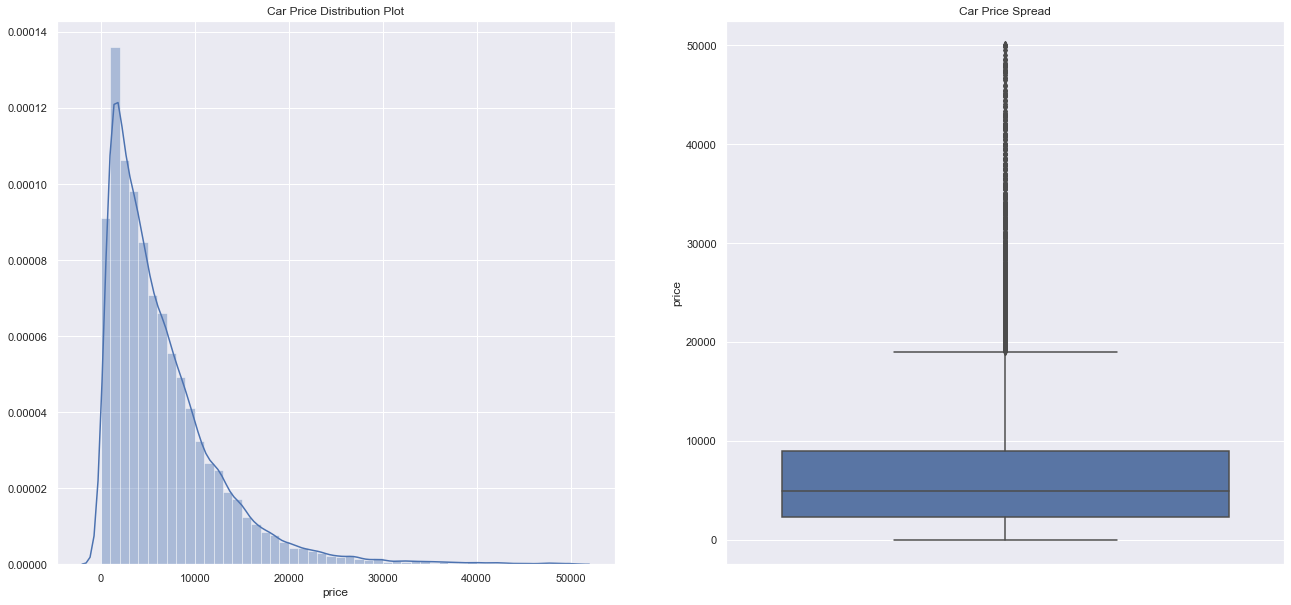

In [60]:
plt.rcParams['figure.figsize'] = (22, 10)

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

In [61]:
print(data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    29991.000000
mean      6596.436659
std       6092.176086
min          1.000000
25%       2300.000000
50%       4900.000000
75%       8990.000000
85%      11900.000000
90%      14000.000000
100%     50000.000000
max      50000.000000
Name: price, dtype: float64


* Biểu đồ lệch trái chứng tỏ hầu hết các loại xe đều có giá tiền thấp 
* Có sự chênh lệch mạnh khi 90% xe có giá từ 14.000 trở xuống, phần còn lại là 50.000

## Trực quan những giá trị phân loại 

* 1. manufacturer
* 2. transmission
* 3. color
* 4. engineFuel 
* 5. enginetype
* 6. body Type
* 7. drivetrain



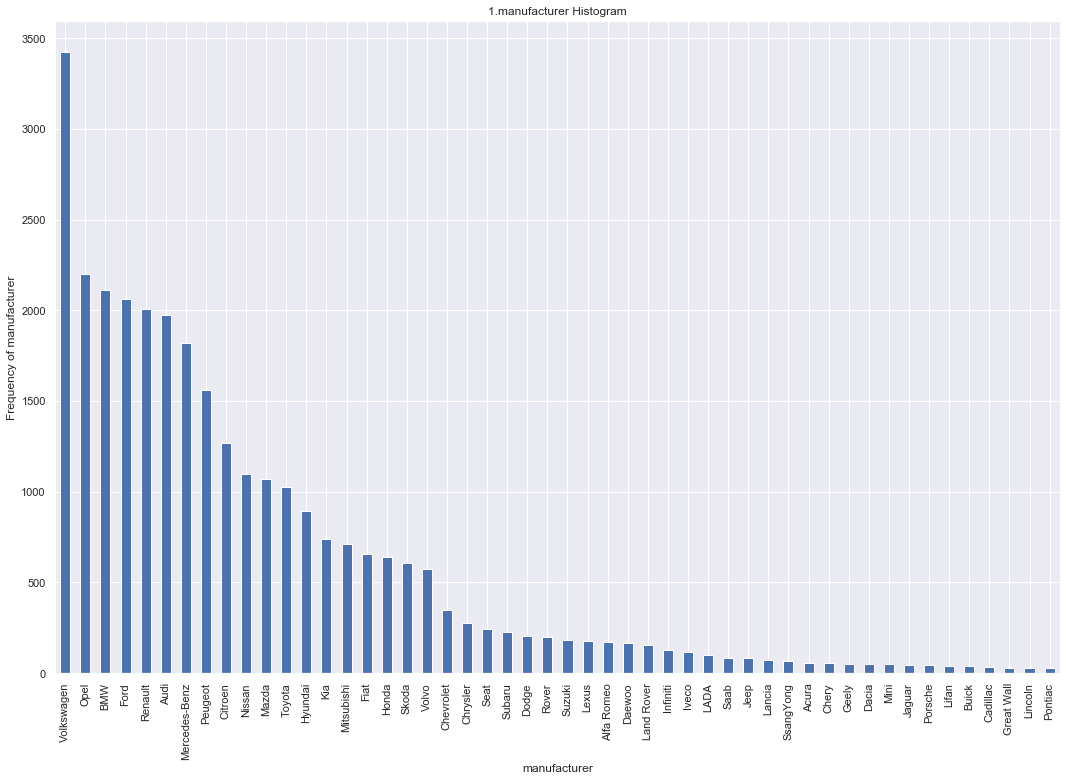

In [62]:
plt.rcParams['figure.figsize'] = (18, 12)
plt1 = data.manufacturer.value_counts().plot('bar')
plt.title('1.manufacturer Histogram')
plt1.set(xlabel = 'manufacturer', ylabel='Frequency of manufacturer')
plt.show()

* Volkswagen là loại xe được yêu thích nhất

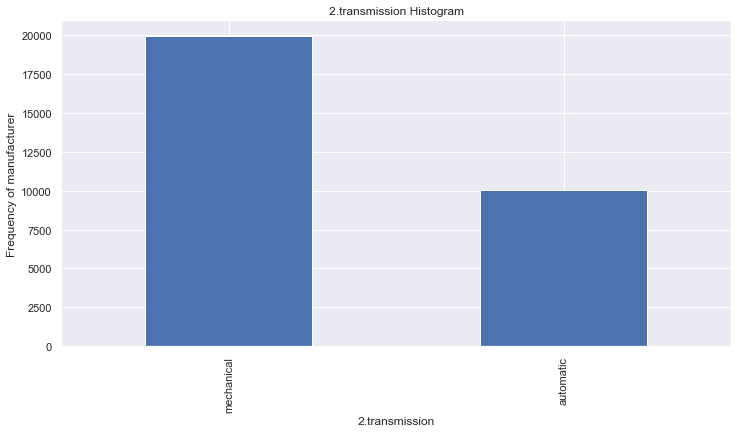

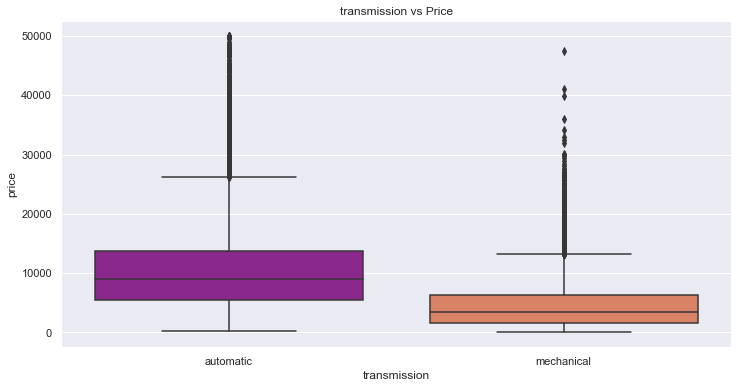

In [63]:
plt.rcParams['figure.figsize'] = (12, 6)
plt1 = data.transmission.value_counts().plot('bar')
plt.title('2.transmission Histogram')
plt1.set(xlabel = '2.transmission', ylabel='Frequency of manufacturer')
plt.show()

sns.boxplot(x=data.transmission, y=data.price, palette=("plasma"))
plt.title('transmission vs Price')
plt.show()

* Automatic thì có giá cao hơn mechanical 

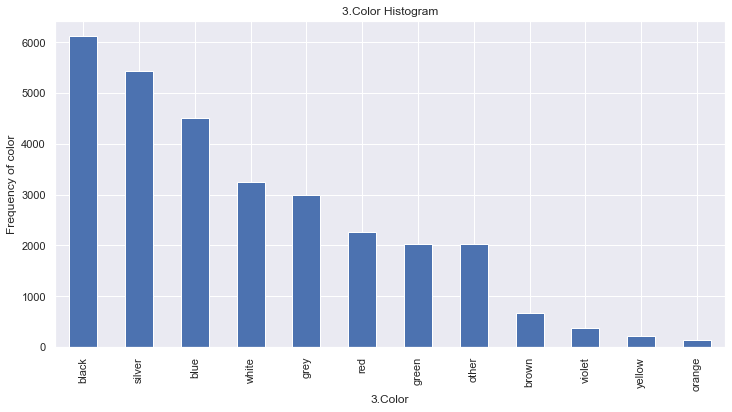

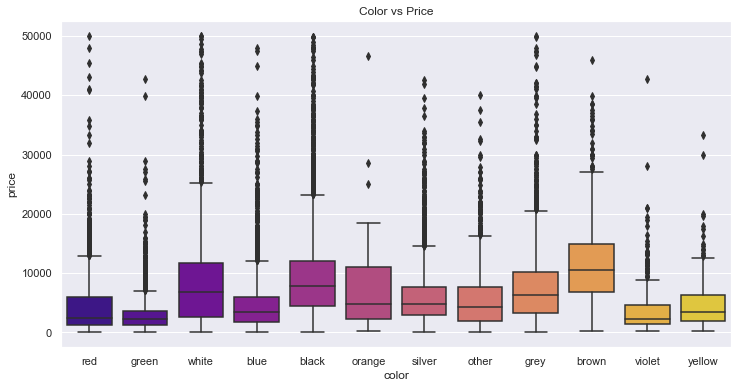

In [64]:
plt.rcParams['figure.figsize'] = (12, 6)
plt1 = data.color.value_counts().plot('bar')
plt.title('3.Color Histogram')
plt1.set(xlabel = '3.Color', ylabel='Frequency of color')
plt.show()

sns.boxplot(x=data.color, y=data.price, palette=("plasma"))
plt.title('Color vs Price')

plt.show()

* Màu nâu, đen và trắng được ưa chuộng nhiều nhất 
=> khách hàng thích sử dụng những màu tối hơn là màu sáng

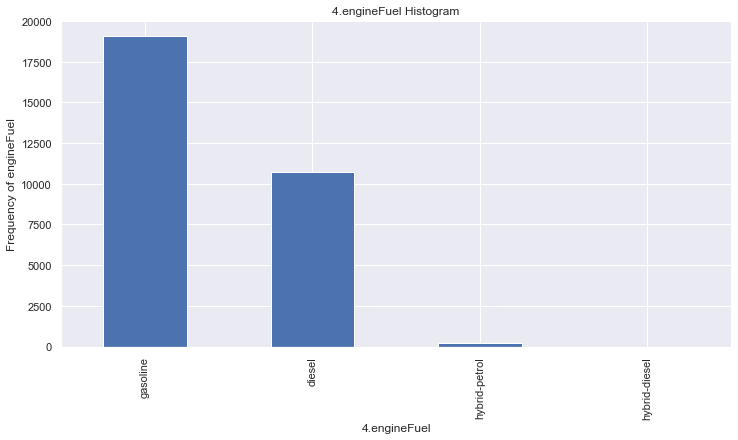

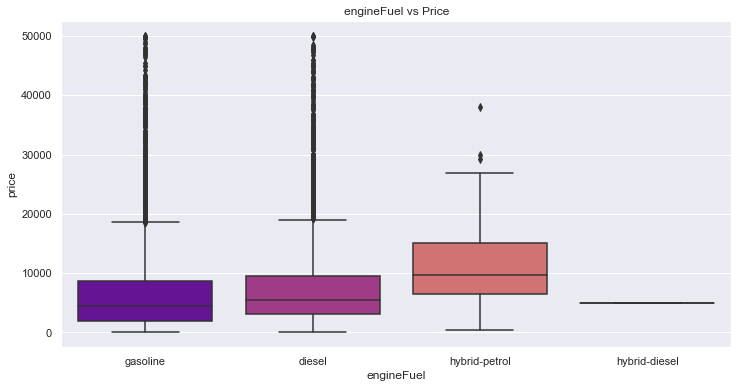

In [65]:
plt.rcParams['figure.figsize'] = (12, 6)
plt1 = data.engineFuel.value_counts().plot('bar')
plt.title('4.engineFuel Histogram')
plt1.set(xlabel = '4.engineFuel', ylabel='Frequency of engineFuel')
plt.show()

sns.boxplot(x=data.engineFuel, y=data.price, palette=("plasma"))
plt.title('engineFuel vs Price')
plt.show()

* số lượng gasoline > diesel, những thành phần còn lại quá nhỏ để có thể so sánh 
* về giá tiền thì cao nhất là hybrid-petrol rồi đến diesel

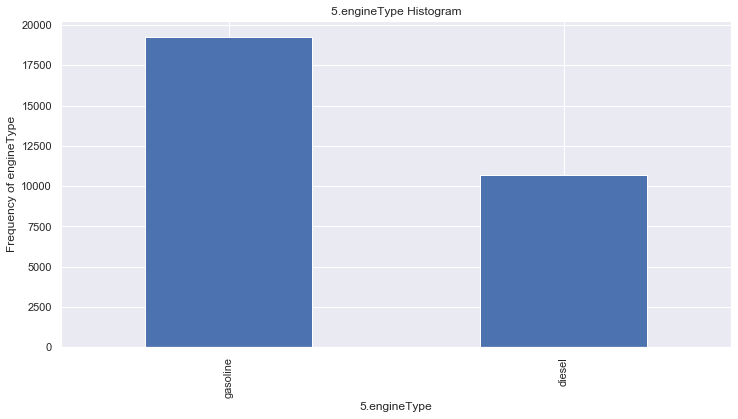

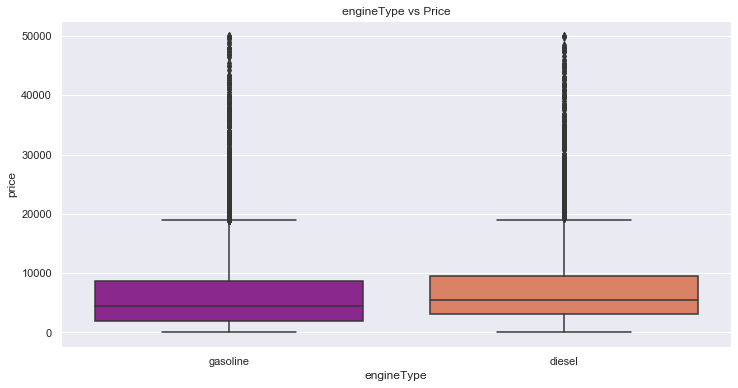

In [66]:
plt.rcParams['figure.figsize'] = (12, 6)
plt1 = data.engineType.value_counts().plot('bar')
plt.title('5.engineType Histogram')
plt1.set(xlabel = '5.engineType', ylabel='Frequency of engineType')
plt.show()

sns.boxplot(x=data.engineType, y=data.price, palette=("plasma"))
plt.title('engineType vs Price')
plt.show()

* Giá tiền không chênh lệch quá nhiều => **engineType** **không gây ảnh hưởng** quá nhiều tới giá tiền

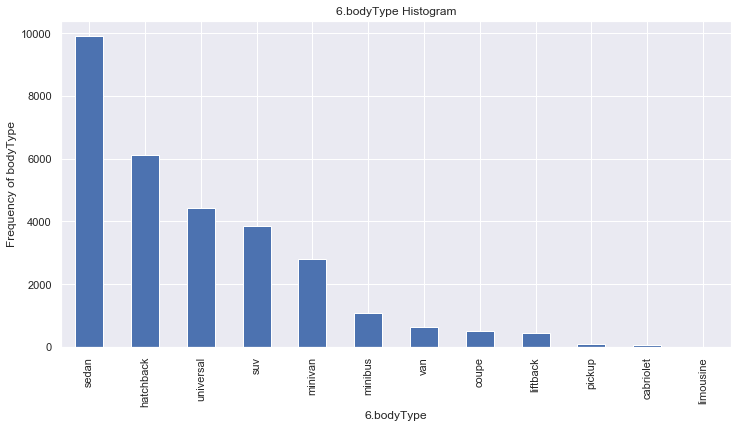

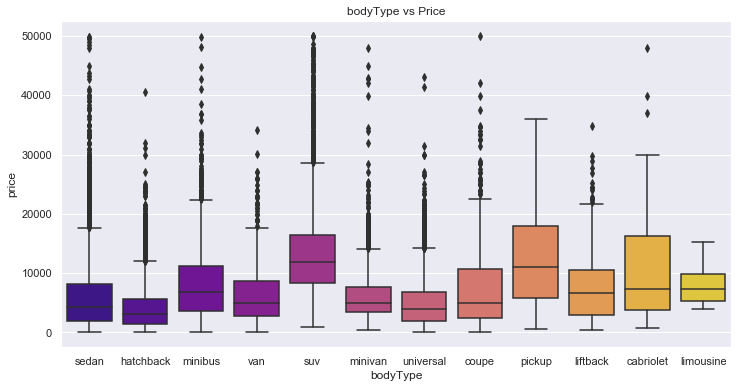

In [67]:
plt.rcParams['figure.figsize'] = (12, 6)
plt1 = data.bodyType.value_counts().plot('bar')
plt.title('6.bodyType Histogram')
plt1.set(xlabel = '6.bodyType', ylabel='Frequency of bodyType')
plt.show()

sns.boxplot(x=data.bodyType, y=data.price, palette=("plasma"))
plt.title('bodyType vs Price')
plt.show()

* pickup vs suv là kiểu xe được yêu thích nhất

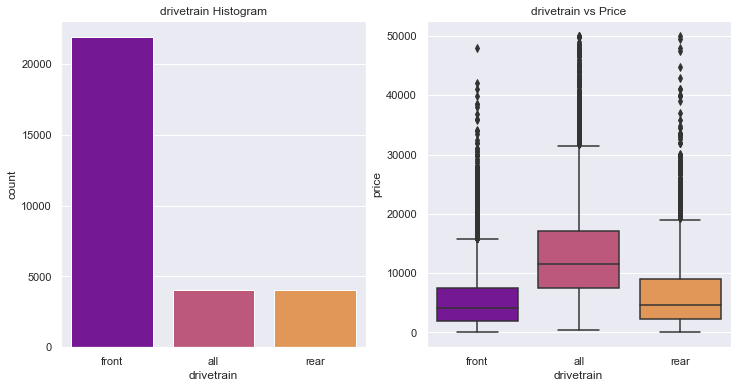

In [68]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.subplot(1,2,1)
plt.title('drivetrain Histogram')
sns.countplot(data.drivetrain, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('drivetrain vs Price')
sns.boxplot(x=data.drivetrain, y=data.price, palette=("plasma"))

* Về giá tiền thì all > front and rear

**Tiêu chuẩn chọn các cột dữ liệu** : Tập trung vào giá trị price . Nếu so sánh giữa tất cả các biến unique trong cột mà giá của chiếc xe ko chênh lệch mấy thì chứng tỏ biến này ko ảnh hưởng đến giá xe => Xóa được 
> Ví dụ : ở cột **engineType** có 2 giá trị là gasoline và diesel mà khi nhìn vào giá tiền (ở biểu đồ boxplot) thì ko chệnh lệch lắm  => xóa được . Còn cột **drivetrain** tuy có biến front và rear có giá tương đương với nhau nhưng biến all lại cao hơn hẳn nên không xóa được 

## Trực quan những cột giá trị số 

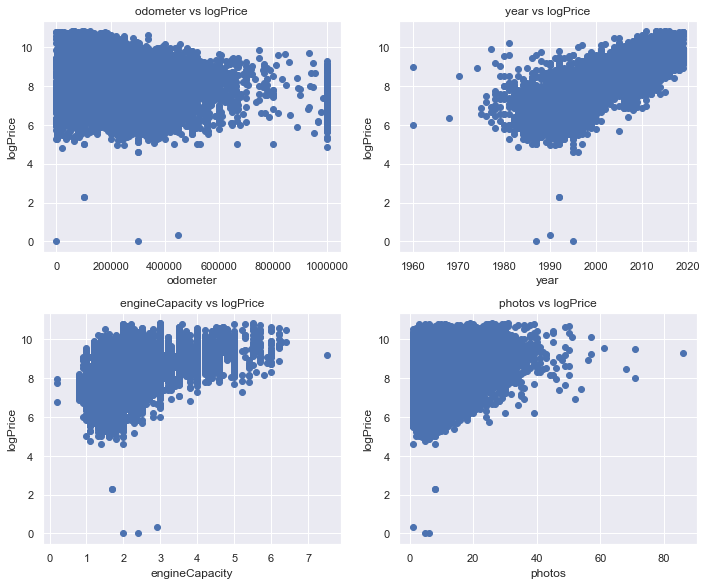

In [69]:
log_price = np.log(data['price'])
data['logprice'] = log_price
data.head()
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['logprice'])
    plt.title(x+' vs logPrice')
    plt.ylabel('logPrice')
    plt.xlabel(x)


plt.figure(figsize=(10,20))

scatter('odometer', 1)
scatter('year', 2)
scatter('engineCapacity', 3)
scatter('photos', 4)

plt.tight_layout()

**Tiêu chuẩn chọn cột dữ liệu** : Nói đơn giản là biểu đồ giữa giá trị cột đó và price tạo thành đường thẳng góc 45 độ vì có nghĩa là khi giá trị này tăng thì price cx tăng = > price phụ thuộc vào cột này 
> * Ở đây thay vì price thì mình sử dụng logprice . Nhìn biểu đồ trên thì chỉ thấy biến **Year** là có ảnh hưởng đến logprice

#### Ở đây dựa vào phân bố giá tiền xe ở đầu bài thì nhóm phân bố thành 3 khoảng giá trị **low** , **medium** , **high** để đánh giá thêm 1 lần nữa sự phụ thuộc vào các cột giá trị vs cột price 

In [70]:
data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['manufacturer'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='manufacturer')
bins = [0,4000,14000,50000]
cars_bin=['low','Medium','High']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data.head(20)

,id,manufacturer,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price,logprice,carsrange
0,1,Hyundai,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,False,False,True,False,False,True,True,15500,9.648595,Medium
1,2,Mitsubishi,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,False,False,False,False,False,False,False,2800,7.937375,Medium
2,3,Volkswagen,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,False,True,True,True,False,16700,9.723164,Medium
3,4,Volkswagen,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,False,False,False,False,False,True,True,11000,9.305651,Medium
4,5,Toyota,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,True,6800,8.824678,Medium
5,6,Volkswagen,mechanical,white,295000,2002,diesel,diesel,2.5,minibus,...,False,False,False,False,False,False,False,8000,8.987197,Medium
6,7,Chery,mechanical,orange,84384,2008,gasoline,gasoline,1.4,hatchback,...,True,False,True,False,False,False,True,2181,7.687786,Medium
7,8,Volkswagen,mechanical,white,385000,2004,diesel,diesel,1.9,van,...,False,False,True,False,False,False,False,10120,9.222269,Medium
8,9,Toyota,automatic,white,83400,2015,gasoline,gasoline,1.6,sedan,...,False,False,True,False,False,True,True,13400,9.503010,Medium
9,10,Opel,mechanical,silver,345000,2002,diesel,diesel,2.2,minibus,...,False,False,False,False,False,False,False,4300,8.366370,Medium


<Figure size 1800x432 with 0 Axes>

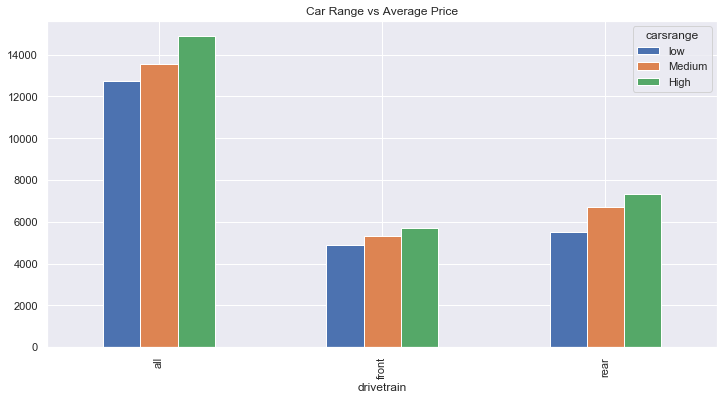

In [71]:
plt.figure(figsize=(25, 6))
df = pd.DataFrame(data.groupby(['drivetrain','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

**Nhận xét** : Không phát hiện ra có thể xóa thêm cột nào =))). Vì các cột dữ liệu còn lại đều phân bố đồng đều ở 3 khoảng giá xe

## Danh sách các biến quan trọng sẽ thực hiện linear
#### 1. manufacturer
#### 2. transmission
#### 3. color
#### 4. engineFuel
#### 5. bodyType
#### 6. drivetrain
#### 7. year

In [72]:
data_cleared = data.drop(['odometer'],axis =1 )
data_cleared = data_cleared .drop(['engineType'],axis =1 )
data_cleared = data_cleared .drop(['engineCapacity'],axis =1 )
data_cleared = data_cleared .drop(['photos'],axis =1 )
data_cleared

,id,manufacturer,transmission,color,year,engineFuel,bodyType,drivetrain,feature_0,feature_1,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price,logprice,carsrange
0,1,Hyundai,automatic,red,2014,gasoline,sedan,front,False,True,...,False,False,True,False,False,True,True,15500,9.648595,Medium
1,2,Mitsubishi,mechanical,green,2000,diesel,hatchback,front,False,True,...,False,False,False,False,False,False,False,2800,7.937375,Medium
2,3,Volkswagen,mechanical,white,2011,diesel,minibus,front,False,True,...,True,False,False,True,True,True,False,16700,9.723164,Medium
3,4,Volkswagen,mechanical,blue,1998,diesel,minibus,front,False,True,...,False,False,False,False,False,True,True,11000,9.305651,Medium
4,5,Toyota,automatic,black,2005,gasoline,sedan,front,False,False,...,False,False,False,False,False,False,True,6800,8.824678,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Acura,automatic,black,2008,gasoline,sedan,front,False,True,...,False,True,True,False,True,True,True,9500,9.159047,NaN
29996,29997,Ford,mechanical,red,1997,gasoline,sedan,front,True,False,...,False,False,False,False,False,False,False,1750,7.467371,NaN
29997,29998,Mitsubishi,mechanical,grey,1993,gasoline,hatchback,front,False,False,...,False,False,False,False,False,False,True,1400,7.244228,NaN
29998,29999,Opel,mechanical,silver,2002,diesel,universal,front,False,True,...,False,False,False,False,False,False,True,3700,8.216088,NaN


## Xử lý các giá trị outliner

In [73]:
# manufacturer
plt.rcParams['figure.figsize'] = (22, 10)
df1 = data_cleared.copy()
a = df1['manufacturer'].value_counts()
#sns.distplot(a.values)
q= a.quantile(0.99)
b=a[a<q]
#sns.distplot(b.values)
df2 = df1[df1['manufacturer']!='Volkswagen']
df2

,id,manufacturer,transmission,color,year,engineFuel,bodyType,drivetrain,feature_0,feature_1,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price,logprice,carsrange
0,1,Hyundai,automatic,red,2014,gasoline,sedan,front,False,True,...,False,False,True,False,False,True,True,15500,9.648595,Medium
1,2,Mitsubishi,mechanical,green,2000,diesel,hatchback,front,False,True,...,False,False,False,False,False,False,False,2800,7.937375,Medium
4,5,Toyota,automatic,black,2005,gasoline,sedan,front,False,False,...,False,False,False,False,False,False,True,6800,8.824678,Medium
6,7,Chery,mechanical,orange,2008,gasoline,hatchback,front,False,True,...,True,False,True,False,False,False,True,2181,7.687786,Medium
8,9,Toyota,automatic,white,2015,gasoline,sedan,front,False,True,...,False,False,True,False,False,True,True,13400,9.503010,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,Audi,automatic,silver,1998,gasoline,universal,front,False,True,...,False,True,True,False,False,True,False,3500,8.160518,NaN
29995,29996,Acura,automatic,black,2008,gasoline,sedan,front,False,True,...,False,True,True,False,True,True,True,9500,9.159047,NaN
29996,29997,Ford,mechanical,red,1997,gasoline,sedan,front,True,False,...,False,False,False,False,False,False,False,1750,7.467371,NaN
29997,29998,Mitsubishi,mechanical,grey,1993,gasoline,hatchback,front,False,False,...,False,False,False,False,False,False,True,1400,7.244228,NaN


,id,manufacturer,transmission,color,year,engineFuel,bodyType,drivetrain,feature_0,feature_1,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price,logprice,carsrange
0,1,Hyundai,automatic,red,2014,gasoline,sedan,front,False,True,...,False,False,True,False,False,True,True,15500,9.648595,Medium
1,2,Mitsubishi,mechanical,green,2000,diesel,hatchback,front,False,True,...,False,False,False,False,False,False,False,2800,7.937375,Medium
6,7,Chery,mechanical,orange,2008,gasoline,hatchback,front,False,True,...,True,False,True,False,False,False,True,2181,7.687786,Medium
8,9,Toyota,automatic,white,2015,gasoline,sedan,front,False,True,...,False,False,True,False,False,True,True,13400,9.503010,Medium
9,10,Opel,mechanical,silver,2002,diesel,minibus,front,True,False,...,False,False,False,False,False,False,False,4300,8.366370,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,29994,Nissan,mechanical,blue,1997,gasoline,sedan,front,True,False,...,False,False,False,False,False,False,False,1024,6.931843,NaN
29994,29995,Audi,automatic,silver,1998,gasoline,universal,front,False,True,...,False,True,True,False,False,True,False,3500,8.160518,NaN
29996,29997,Ford,mechanical,red,1997,gasoline,sedan,front,True,False,...,False,False,False,False,False,False,False,1750,7.467371,NaN
29997,29998,Mitsubishi,mechanical,grey,1993,gasoline,hatchback,front,False,False,...,False,False,False,False,False,False,True,1400,7.244228,NaN


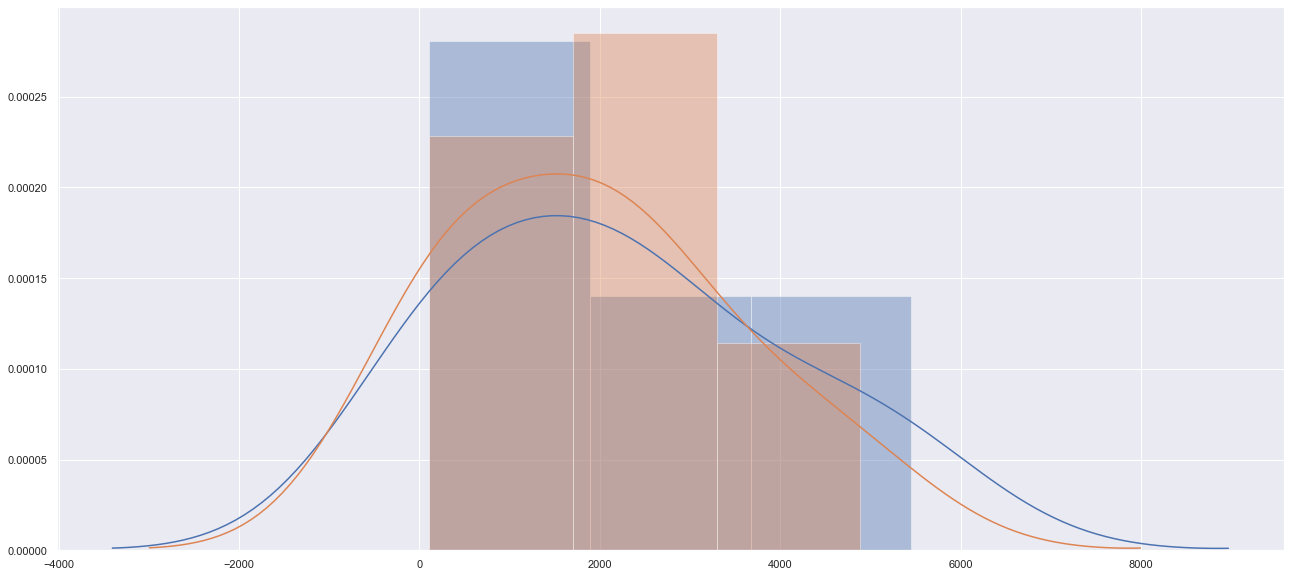

In [74]:
#color
a = df2['color'].value_counts()
a
sns.distplot(a.values)
q= a.quantile(0.99)
b=a[a<q]
b
sns.distplot(b.values)
df3 = df2[df2['color']!='black']
df3

,id,manufacturer,transmission,color,year,engineFuel,bodyType,drivetrain,feature_0,feature_1,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price,logprice,carsrange
1,2,Mitsubishi,mechanical,green,2000,diesel,hatchback,front,False,True,...,False,False,False,False,False,False,False,2800,7.937375,Medium
6,7,Chery,mechanical,orange,2008,gasoline,hatchback,front,False,True,...,True,False,True,False,False,False,True,2181,7.687786,Medium
9,10,Opel,mechanical,silver,2002,diesel,minibus,front,True,False,...,False,False,False,False,False,False,False,4300,8.366370,Medium
12,13,Dodge,automatic,silver,2007,gasoline,hatchback,front,False,True,...,True,False,False,False,False,False,False,6000,8.699515,Medium
13,14,Toyota,automatic,blue,2001,diesel,suv,all,False,True,...,False,False,False,False,False,False,False,10500,9.259131,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29984,29985,Ford,mechanical,white,1991,diesel,hatchback,front,True,False,...,False,False,False,False,False,False,False,450,6.109248,Medium
29987,29988,Mercedes-Benz,mechanical,blue,2006,diesel,minibus,rear,False,False,...,False,True,False,False,False,True,True,9999,9.210240,Medium
29994,29995,Audi,automatic,silver,1998,gasoline,universal,front,False,True,...,False,True,True,False,False,True,False,3500,8.160518,NaN
29997,29998,Mitsubishi,mechanical,grey,1993,gasoline,hatchback,front,False,False,...,False,False,False,False,False,False,True,1400,7.244228,NaN


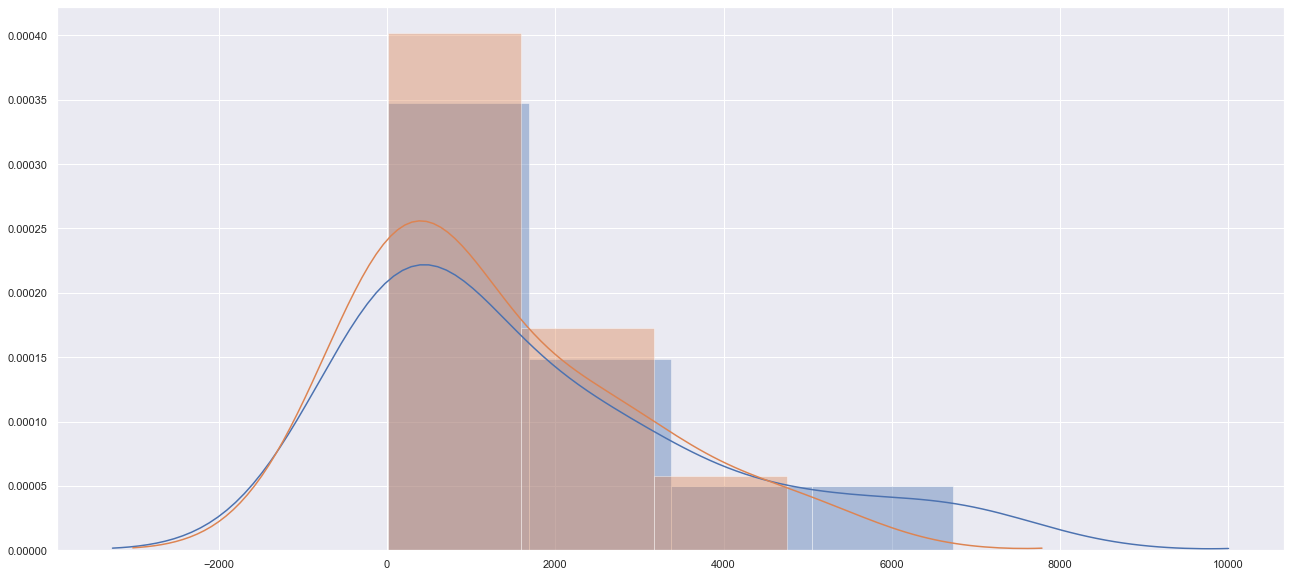

In [75]:
#bodyType
a = df3['bodyType'].value_counts()
a
sns.distplot(a.values)
q= a.quantile(0.99)
b=a[a<q]
sns.distplot(b.values)
df4 = df3[df3['bodyType']!='sedan']
df4

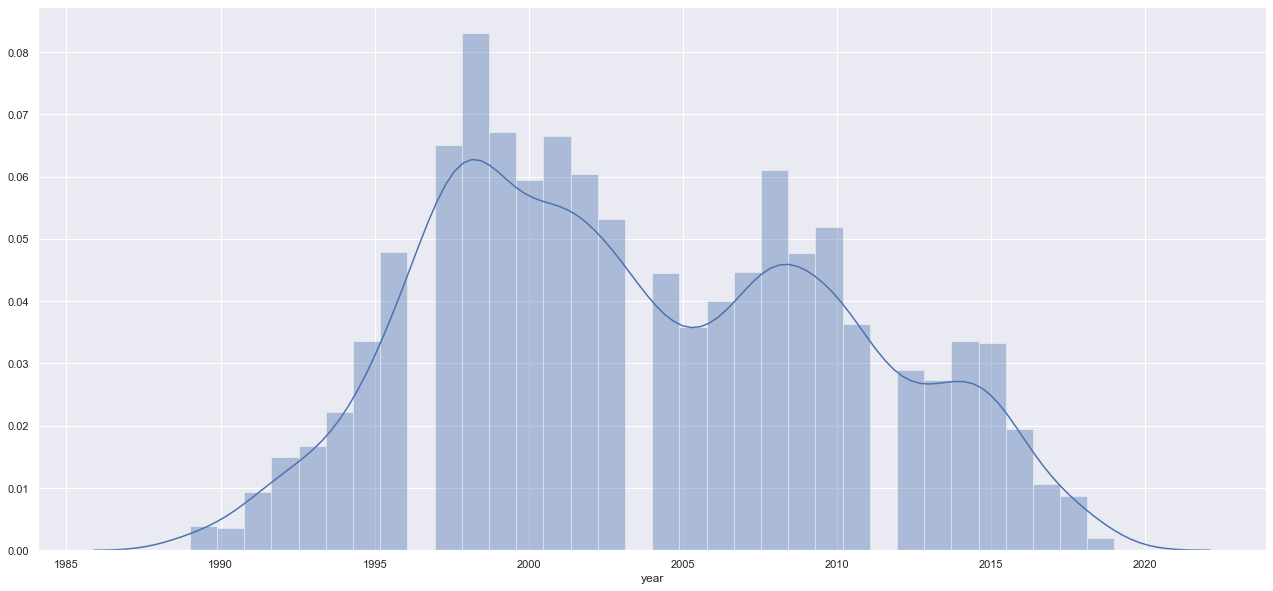

In [76]:
# year
q = df4['year'].quantile(0.01)
data = df4[df4['year'] >q]
data['year'].describe()
data
sns.distplot(data['year'])

## Xử lý các giá trị dummies

In [77]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies= data_dummies.astype(float)
data_dummies
data_dummies.columns.values

array(['id', 'year', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'price', 'logprice', 'manufacturer_Alfa Romeo',
       'manufacturer_Audi', 'manufacturer_BMW', 'manufacturer_Buick',
       'manufacturer_Cadillac', 'manufacturer_Chery',
       'manufacturer_Chevrolet', 'manufacturer_Chrysler',
       'manufacturer_Citroen', 'manufacturer_Dacia',
       'manufacturer_Daewoo', 'manufacturer_Dodge', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Geely',
       'manufacturer_Great Wall', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Infiniti',
       'manufacturer_Iveco', 'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_LADA', 'manufacturer_Lancia',
       'manufacturer_Land Rover', 'manufacturer_Lexus',
       'manufacturer_Lifan', 'manufacturer_Lincoln', 'manufacturer_Mazda',
       'manufacturer_Mercedes-Benz', 'manu

In [78]:
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed['logprice'] = np.log(data_preprocessed['price'])
data_preprocessed=data_preprocessed.drop(['price'],axis=1)
#data_preprocessed.columns.values

In [79]:
export_csv = data_preprocessed.to_csv ('input.csv', index = None, header=True)

## Chạy thuật toán Linear Regression

In [80]:
targets = data_preprocessed['logprice']
inputs = data_preprocessed.drop(['logprice'],axis=1)

#### Scale data về dạng tiêu chuẩn 

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
inputs_scaled = scaler.transform(inputs)

#### tách data để train và test

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

**---------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------**

In [84]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_hat = reg.predict(x_train)

#### Tính E_in

logprice    0.121142
dtype: float64

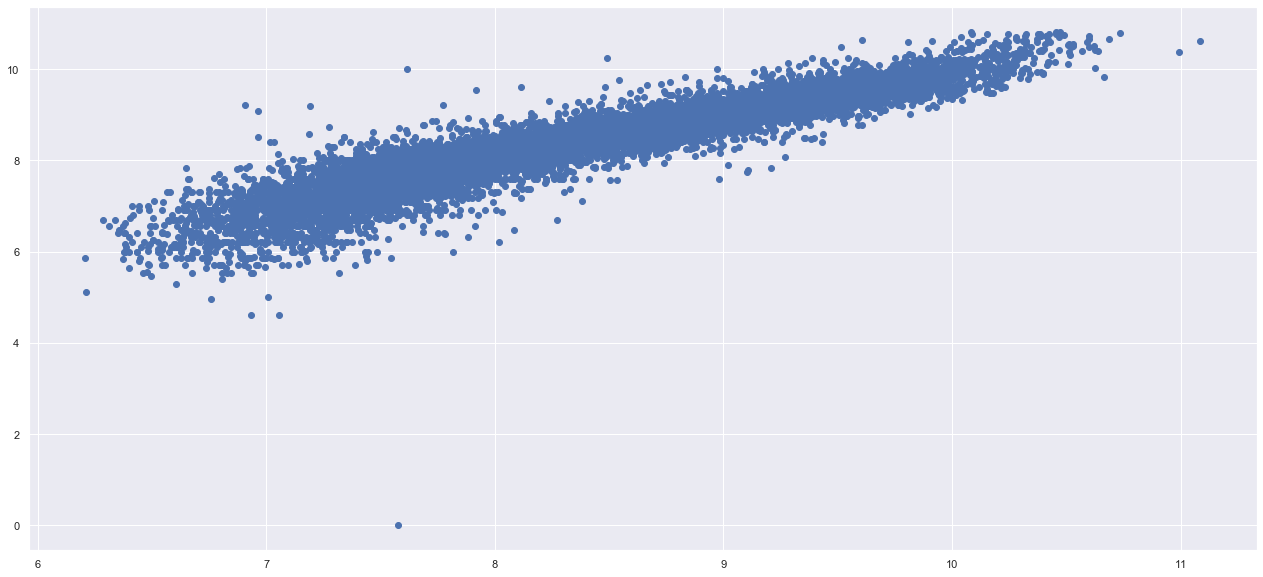

In [86]:
plt.scatter(y_hat,y_train)
dftest = pd.DataFrame((y_train - y_hat)**2)
dftest.mean()

In [87]:
reg.score(x_train,y_train)

0.8648392100941173

In [88]:
## giá trị bias
reg.intercept_

8.354503176616038

In [89]:
## các biến x1, x2, ... ,xn
temp = pd.DataFrame(inputs.columns.values , columns = ['features'])
temp['weights'] = reg.coef_
temp

,features,weights
0,id,0.001694
1,year,0.667770
2,feature_0,-0.042172
3,feature_1,0.032396
4,feature_2,0.017586
...,...,...
83,bodyType_van,0.012798
84,drivetrain_front,-0.075116
85,drivetrain_rear,-0.013304
86,carsrange_Medium,0.002968


## Testing

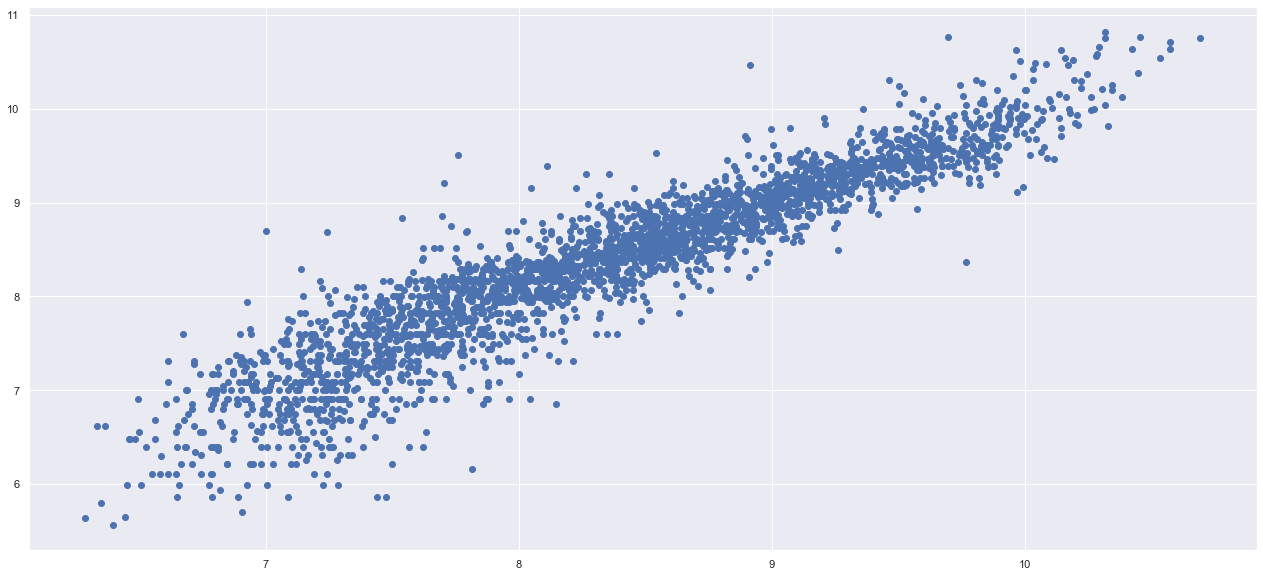

In [98]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_hat_test,y_test)

#### Tính E_out

In [108]:
dftest = pd.DataFrame((y_test - y_hat_test)**2)
print('E_in: ',dftest.mean())

E_in:  logprice    0.111396
dtype: float64


In [109]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,4064.272205
1,7496.546620
2,12024.805575
3,12499.420914
4,13917.527426


In [102]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.411833
1    8.922658
2    8.961879
3    9.464983
4    9.449357
Name: logprice, dtype: float64

In [110]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,4064.272205,4500.0
1,7496.546620,7500.0
2,12024.805575,7800.0
3,12499.420914,12900.0
4,13917.527426,12700.0


In [111]:
df_pf['different']= df_pf.Target - df_pf.Prediction
df_pf['%'] = np.absolute(df_pf['different'] / df_pf.Target *100)
df_pf.describe()

,Prediction,Target,different,%
count,2844.000000,2844.000000,2844.000000,2844.000000
mean,6146.694659,6348.476442,201.781783,26.245736
std,5659.986102,5981.547325,2398.919923,31.408014
min,538.207434,260.000000,-13123.632521,0.002411
25%,2117.855271,2300.000000,-603.090409,8.888098
50%,4259.718395,4500.000000,80.806898,18.346767
75%,8232.081180,8628.250000,889.020297,32.332885
max,43980.687467,49950.000000,30982.054055,422.243731


**Nhận xét** : Nhìn vào cột % ta thấy dự đoán khá okie với các mức giá xe từ low cho đến medium còn những các giá quá cao thì sai lệch rất nhiều